# Spatial Sentiment Analysis using Flair NLP and Tweepy
See here for more infor on FLair: https://github.com/zalandoresearch/flair

## Import packages ( I hope this many imports are duty-free)

In [1]:
import tweepy
import re
import flair
from flair.models import TextClassifier
from flair.data import Sentence
from flair.models import SequenceTagger
from textblob import TextBlob
import pandas as pd 
import numpy as np
import nltk
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import folium
import random
import string
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
from tqdm import tqdm, tqdm_notebook
import matplotlib.pyplot as plt 
import seaborn as sns
tqdm.pandas(tqdm_notebook)


D:\Aero\Anaconda35_64\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


Better speed can be achieved with apex installed from https://www.github.com/nvidia/apex.


### set keys for twitter api

In [2]:
consumer_key = 'your_key'
consumer_key_secret = 'your_key'
access_token = 'your_key'
access_token_secret = 'your_key'

In [3]:
auth = tweepy.OAuthHandler(consumer_key, consumer_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

### define what and when we search for tweets

In [6]:
search_words = "#ArcGIS -filter:retweets"
date_since = "2019-03-05"

In [7]:
tweets = tweepy.Cursor(api.search,
              q=search_words,
              lang="en",
              since=date_since).items()

# Iterate on tweets
text_locs = [[tweet.text, tweet.user.location] for tweet in tweets]

In [8]:
tweet_text = pd.DataFrame(data=text_locs, 
                    columns=['text', "location"])

In [9]:
tweet_text

,text,location
0,#Conflation increases the #spatial accuracy of...,"Melbourne, Australia"
1,Map cake #DevSummit #ArcGIS https://t.co/CDOC4...,Earth
2,I have had to play around in #arcgis more than...,"Philadelphia, PA"
3,Esri &amp; NVIDIA jointly delivered the first ...,"London, England"
4,Line of Sight is one of the many features that...,"Redlands, CA"
5,Effective Community Engagement w/ #ArcGIS Hub:...,"Washington, DC"
6,Get mappy and show off your work at the @Esri ...,Global
7,Way cool tech #speedgeeking #devsummit AR beta...,the Left Coast
8,"Florida’s largest county, @CollierPIO, gets se...",Salt Lake City | Utah | USA
9,Excellent #ArcGIS powered #StoryMap from Golde...,"Charlotte, NC"


In [11]:
tweet_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 2 columns):
text        125 non-null object
location    125 non-null object
dtypes: object(2)
memory usage: 2.0+ KB


## Clean me up Scotty! (Clean the text by removing '#',emoji, punct,etc)

In [12]:
 def clean_tweet(tweet): 
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

In [13]:
tweet_text['tweet_clean'] = tweet_text['text'].progress_apply(clean_tweet)

100%|█████████████████████████████████████████████████████████████████████████████| 125/125 [00:00<00:00, 10381.94it/s]


### Lets take a look at a word cloud

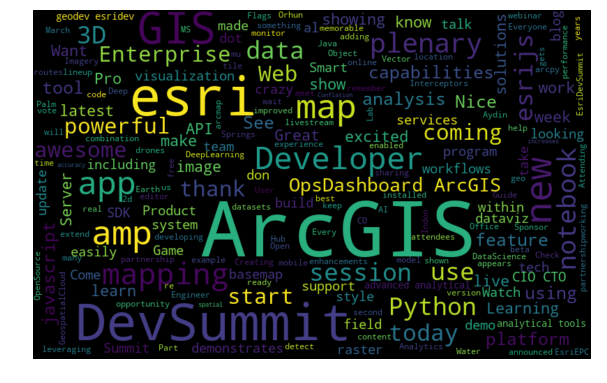

In [19]:
all_words = ' '.join([text for text in tweet_text['tweet_clean']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### Let's see what hashtags are accompanied with these tweets

In [20]:
#This function will pull all the hastags used in the tweet so we can see what are other popular #
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [21]:
tweet_ht = hashtag_extract(tweet_text['text'])
tweet_ht = sum(tweet_ht,[])

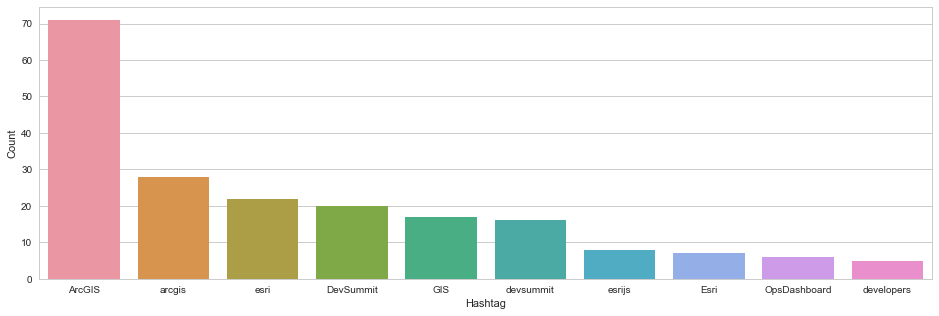

In [22]:
a = nltk.FreqDist(tweet_ht)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
sns.set(style="whitegrid")
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

## Lets see if anyone is mentioning location in the tweet

In [23]:
tagger = SequenceTagger.load('ner')


2019-03-05 21:29:39,215 loading file C:\Users\sean4788\.flair\models\en-ner-conll03-v0.4.pt


In [24]:
# use a function to scan each text and pull out all the text it thinks are locations
def flair_loc(x):
    sentence = Sentence(x)
    tagger.predict(sentence)
    for entity in sentence.get_spans('ner-fast'):
        if entity.tag =='LOC':
            return(entity.text)
    

In [25]:
tweet_text['flair_loc'] = tweet_text['tweet_clean'].progress_apply(flair_loc)

  0%|                                                                                          | 0/125 [00:00<?, ?it/s]

RuntimeError: CUDA out of memory. Tried to allocate 67.25 MiB (GPU 0; 2.00 GiB total capacity; 478.41 MiB already allocated; 38.50 MiB free; 32.97 MiB cached)

In [ ]:
tweet_text.info()

In [ ]:
tweet_text

# Analyze the sentiment using Flair TextClassifier

In [ ]:
#flair score  0-1
tqdm.pandas(tqdm_notebook)

classifier = TextClassifier.load('en-sentiment')
def f_sent(x):
    sentence = Sentence(x)
    classifier.predict(sentence)
    for label in sentence.labels:        
        return(label.score)
        
tweet_text['flair_sent'] = tweet_text['text'].progress_apply(f_sent)

In [ ]:
#flair vale     i.e. POS or NEG
tqdm.pandas(tqdm_notebook)

classifier = TextClassifier.load('en-sentiment')
def f_sent_val(x):
    sentence = Sentence(x)
    classifier.predict(sentence)
    for label in sentence.labels:        
        return(label.value)
        
tweet_text['flair_sent_val'] = tweet_text['text'].progress_apply(f_sent_val)

In [ ]:
def calc_score(x):
    for i in x:
        if tweet_text.flair_sent_val == 'NEGATIVE':
            i*-1
    return x

In [ ]:
# need to take all the NEG reviews and multiply their score by -1 in order to created a 
# range where -1<--->0= NEG and 0<-->1= POS
tweet_text['flair_sent'] = tweet_text['flair_sent'].multiply(-1)
    

In [ ]:
tweet_text

## Geocode the location info to get Lat/Lon

In [ ]:
nom=Nominatim(user_agent="youvegotmail@aol.com", timeout=5)
tweet_text["coordinates"]=tweet_text["location"].progress_apply(nom.geocode)


In [ ]:
tweet_text["lat"]=tweet_text["coordinates"].progress_apply(lambda x: x.latitude if x != None else None)
tweet_text["long"]=tweet_text["coordinates"].progress_apply(lambda x: x.longitude if x != None else None)

In [ ]:
tweet_text.dropna(inplace=True)

In [ ]:
locations = tweet_text[['lat', 'long']]
locationlist = locations.values.tolist()

In [ ]:
locationlist

In [ ]:
# from folium.plugins import HeatMap
# map = folium.Map(tiles='CartoDB dark_matter')
# for point in range(0, len(locationlist)):
#     folium.CircleMarker(locationlist[point], radius=.5, fill=True,fill_opacity=.7,popup=tweet_text['text'][point]).add_to(map)
# map.save('./map2.html')

In [ ]:
#generate a heatmap of where the location of the people tweeting are located
from folium.plugins import HeatMap
hmap = folium.Map(tiles='CartoDB dark_matter',control_scale = True)
hmap.add_child(HeatMap(locationlist, radius = 16, gradient={0.2: 'blue', .5: 'lime', 1: 'red'}))
hmap.save('./heatmap.html')

In [ ]:
hmap

In [ ]:
tweet_text.to_csv('./tweet_text_out.csv')

### To Do:


In [ ]:
# create map of location mentioned in actual tweet
# store tweet times
# retweet counts for user
# drop results to rest service for use in dashboard
# calculate polarity scores